In [ ]:
pip install yfinance pandas matplotlib

In [ ]:
%%writefile banking_stock_scraper.py
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

banking_stocks = ["SBIN.NS", "HDFCBANK.NS", "ICICIBANK.NS", "AXISBANK.NS", "KOTAKBANK.NS"]
start_date = "2024-03-29"
end_date = "2025-03-29"
all_data = pd.DataFrame()

for stock in banking_stocks:
    data = yf.download(stock, start=start_date, end=end_date)
    data["Stock"] = stock
    all_data = pd.concat([all_data, data])

all_data.to_csv("banking_stock_data.csv", index=True)
print("Banking sector stock data saved successfully!")

plt.figure(figsize=(10, 5))
for stock in banking_stocks:
    stock_data = all_data[all_data["Stock"] == stock]
    plt.plot(stock_data.index, stock_data["Close"], label=stock)

plt.xlabel("Date")
plt.ylabel("Closing Price (INR)")
plt.title("Banking Sector Stock Prices Over the Last Year")
plt.legend()
plt.show()


Overwriting banking_stock_scraper.py


In [ ]:
!python banking_stock_scraper.py

YF.download() has changed argument auto_adjust default to True
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Banking sector stock data saved successfully!
Figure(1000x500)


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/content/banking_stock_data New.csv")

# Display the first few rows
print(df)

            Date        Close         High          Low         Open  \
0     01-04-2024   745.793274   748.940508   739.695519   746.530904   
1     02-04-2024   753.759705   756.070922   740.924892   745.694936   
2     03-04-2024   758.333008   759.857432   747.612818   752.284476   
3     04-04-2024   746.776794   762.512905   745.596574   762.217865   
4     05-04-2024   752.136902   755.038259   740.187269   745.449067   
...          ...          ...          ...          ...          ...   
1235  24-03-2025  2176.149902  2184.250000  2090.250000  2100.000000   
1236  25-03-2025  2170.000000  2202.500000  2160.000000  2179.899902   
1237  26-03-2025  2144.899902  2176.000000  2129.899902  2175.000000   
1238  27-03-2025  2128.649902  2151.399902  2111.850098  2144.000000   
1239  28-03-2025  2171.199951  2179.899902  2139.000000  2139.300049   

        Volume         Stock  
0      9949971       SBIN.NS  
1     15713063       SBIN.NS  
2     19136981       SBIN.NS  
3     15889

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/content/banking_stock_data New.csv")

# Assuming the date column is named 'Unnamed: 0'
# Rename the 'Unnamed: 0' column to 'Date'
df = df.rename(columns={'Unnamed: 0': 'Date'})

# Convert Date column to datetime format and sort the data
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
df = df.sort_values(by="Date")

# Check for missing values
missing_values = df.isnull().sum()

# Display the cleaned data info and missing values
df.info(), missing_values

<class 'pandas.core.frame.DataFrame'>
Index: 1240 entries, 0 to 1239
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1240 non-null   datetime64[ns]
 1   Close   1240 non-null   float64       
 2   High    1240 non-null   float64       
 3   Low     1240 non-null   float64       
 4   Open    1240 non-null   float64       
 5   Volume  1240 non-null   int64         
 6   Stock   1240 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 77.5+ KB


(None,
 Date      0
 Close     0
 High      0
 Low       0
 Open      0
 Volume    0
 Stock     0
 dtype: int64)

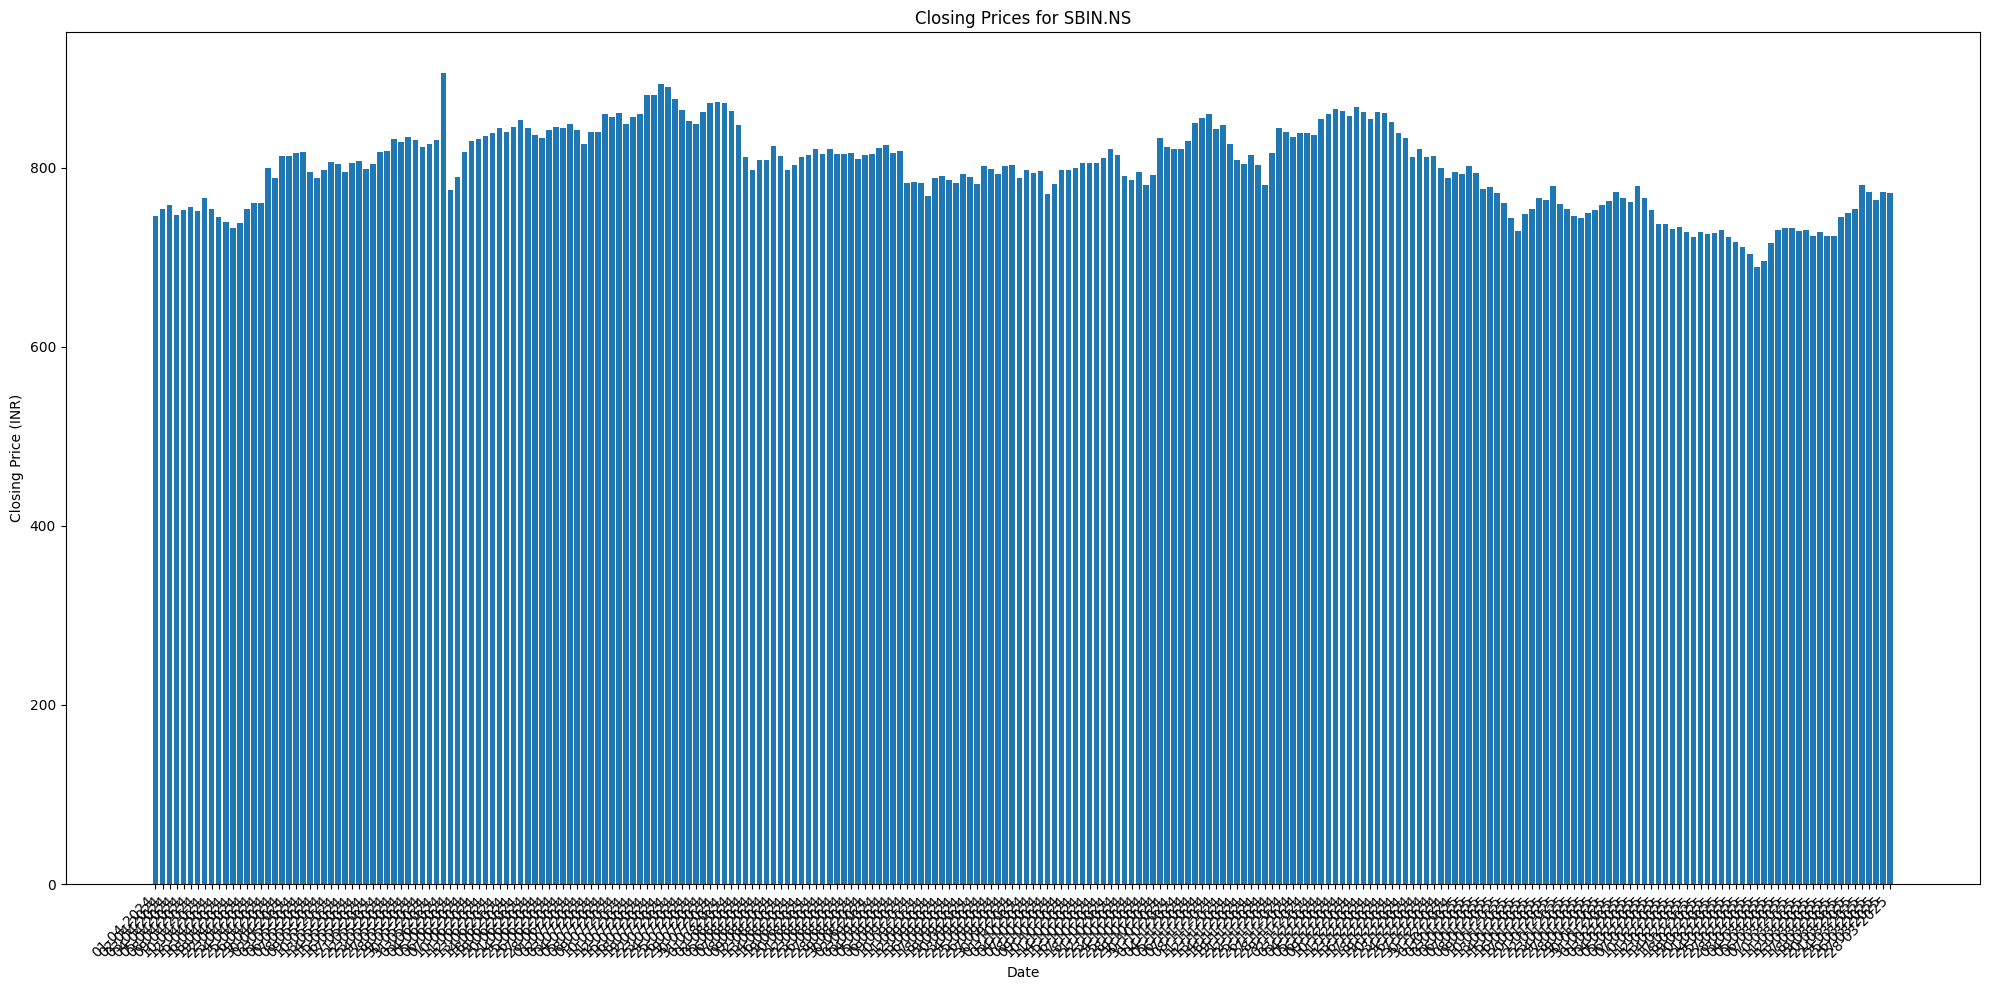

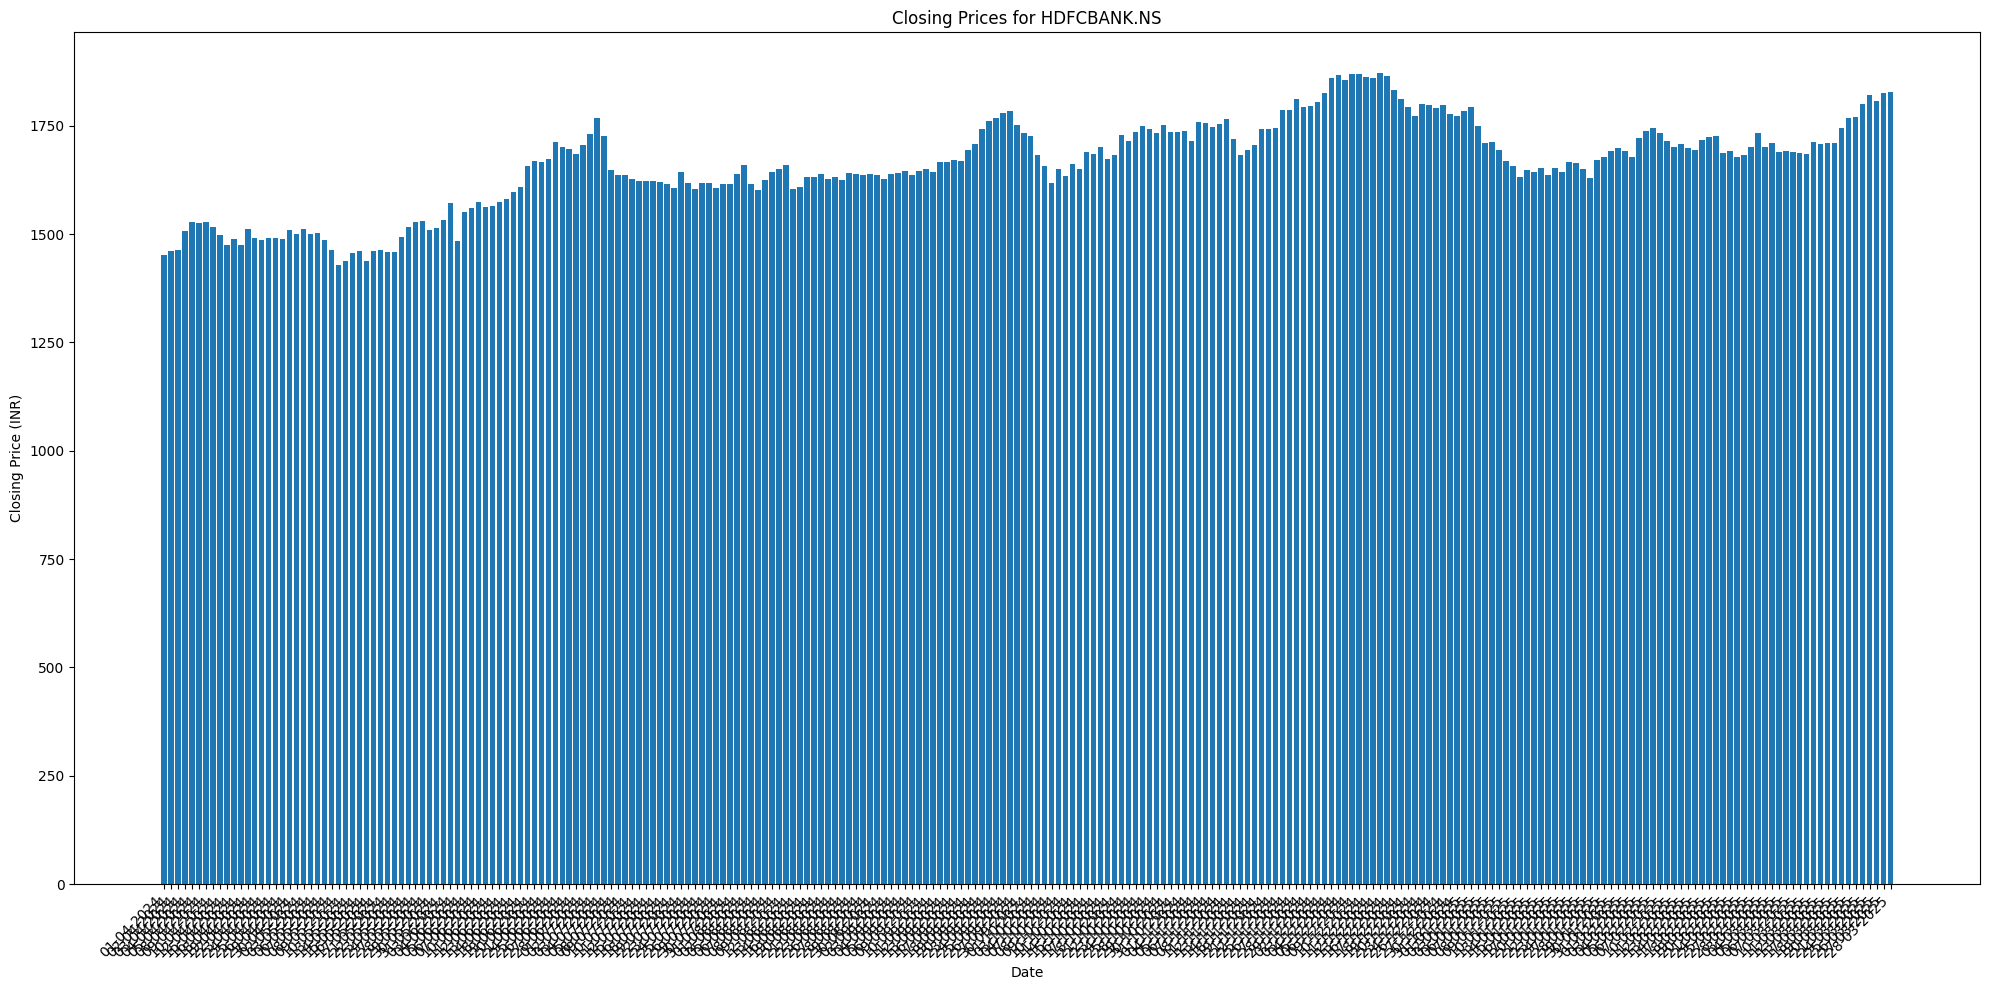

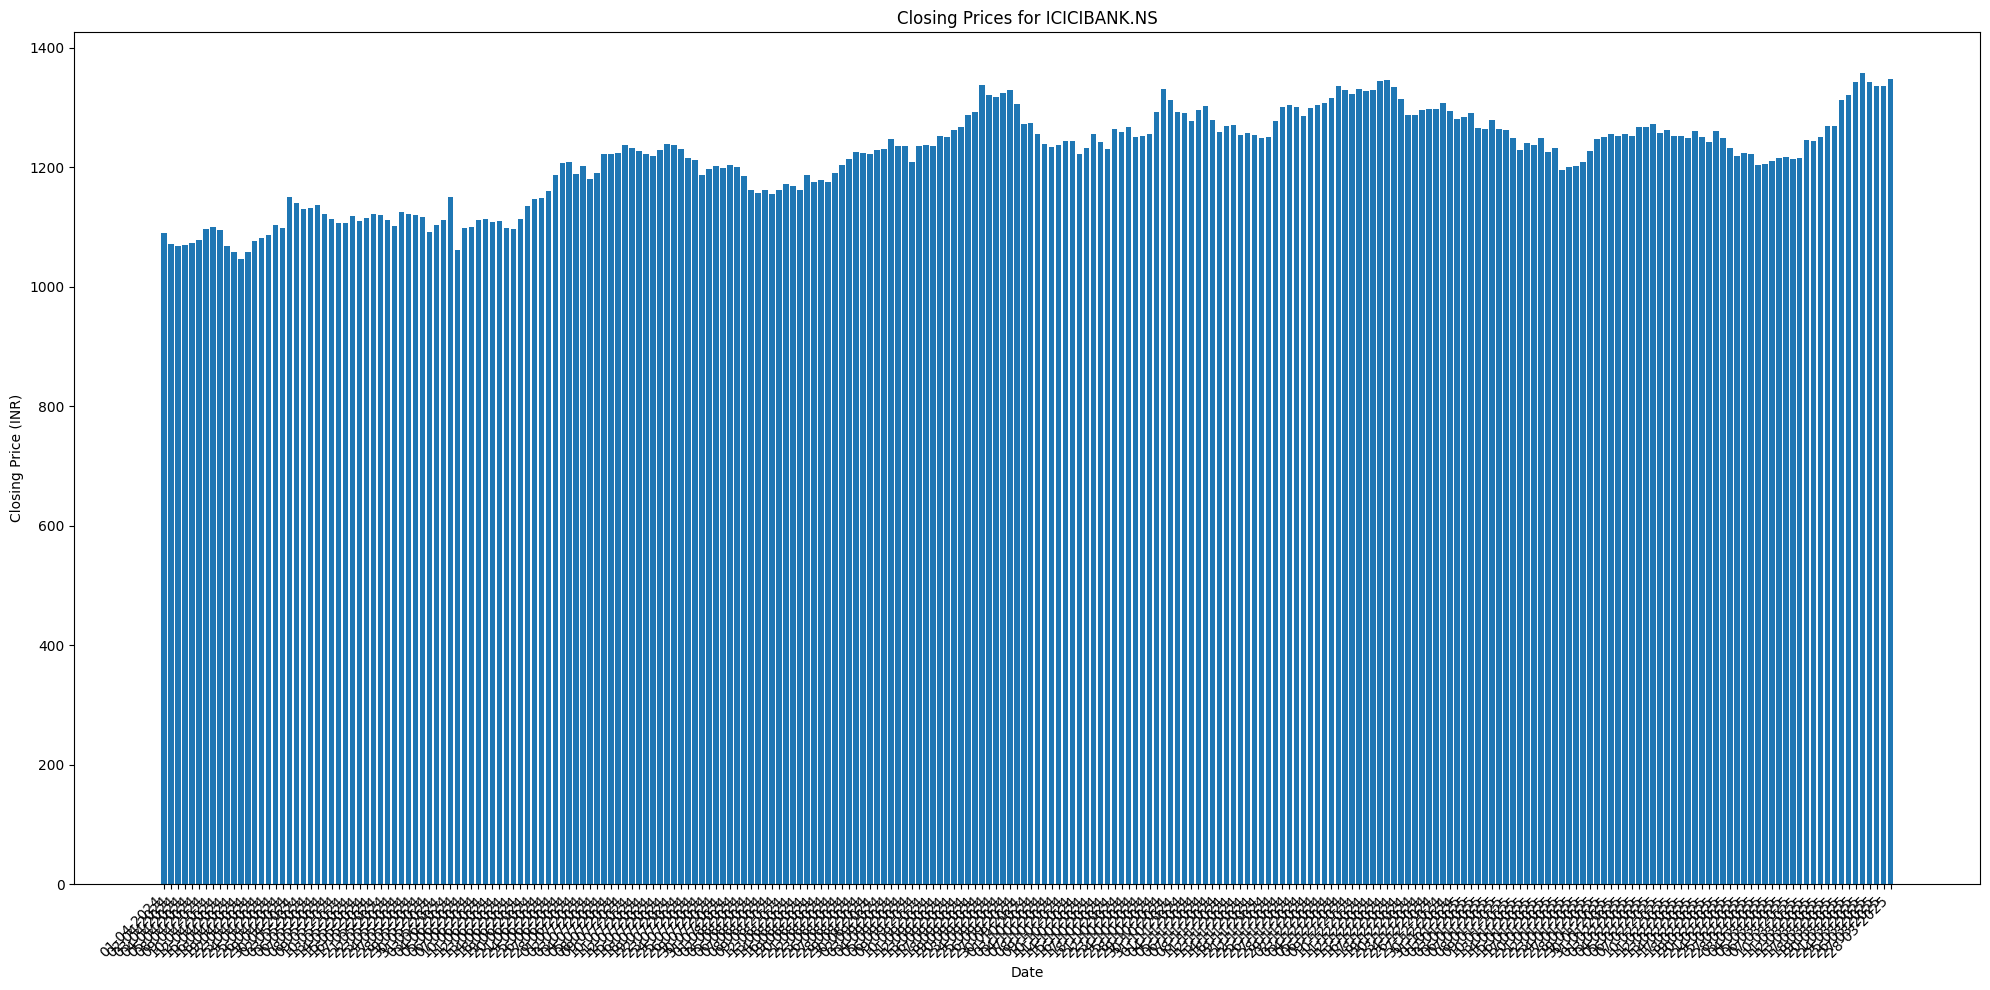

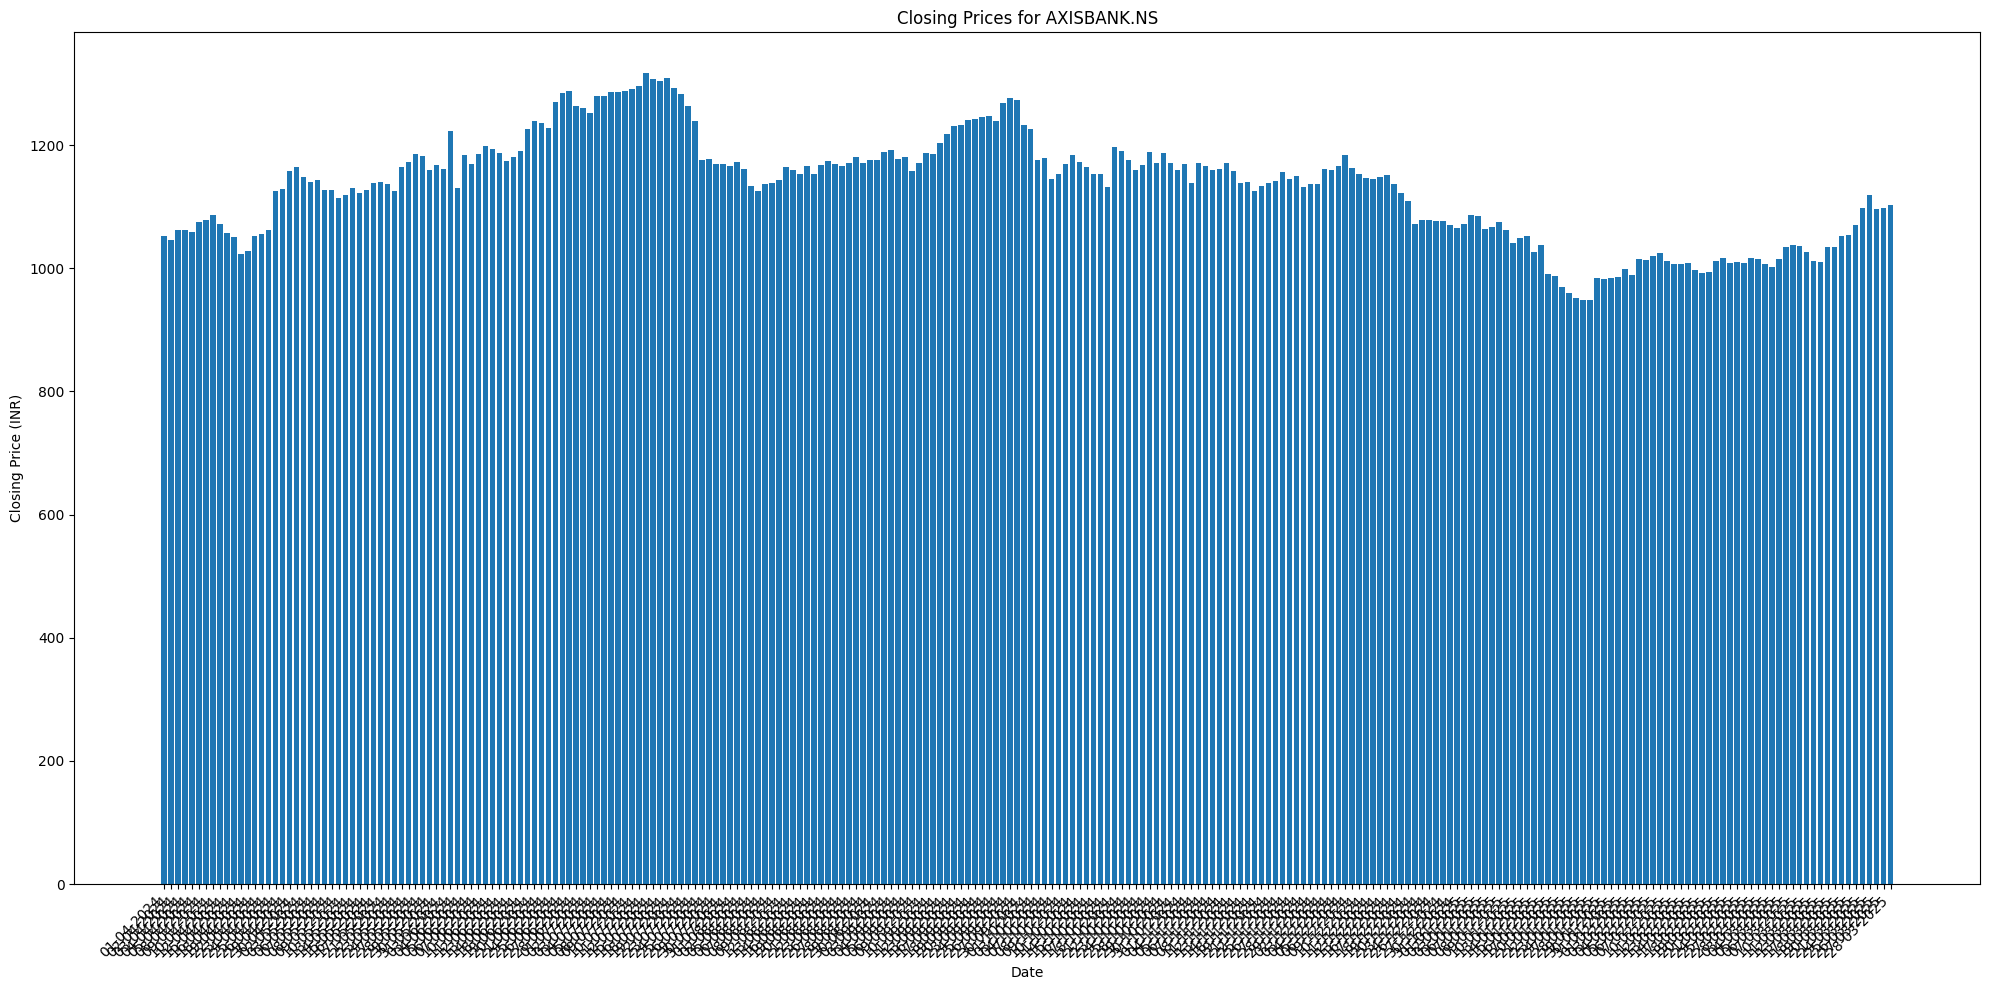

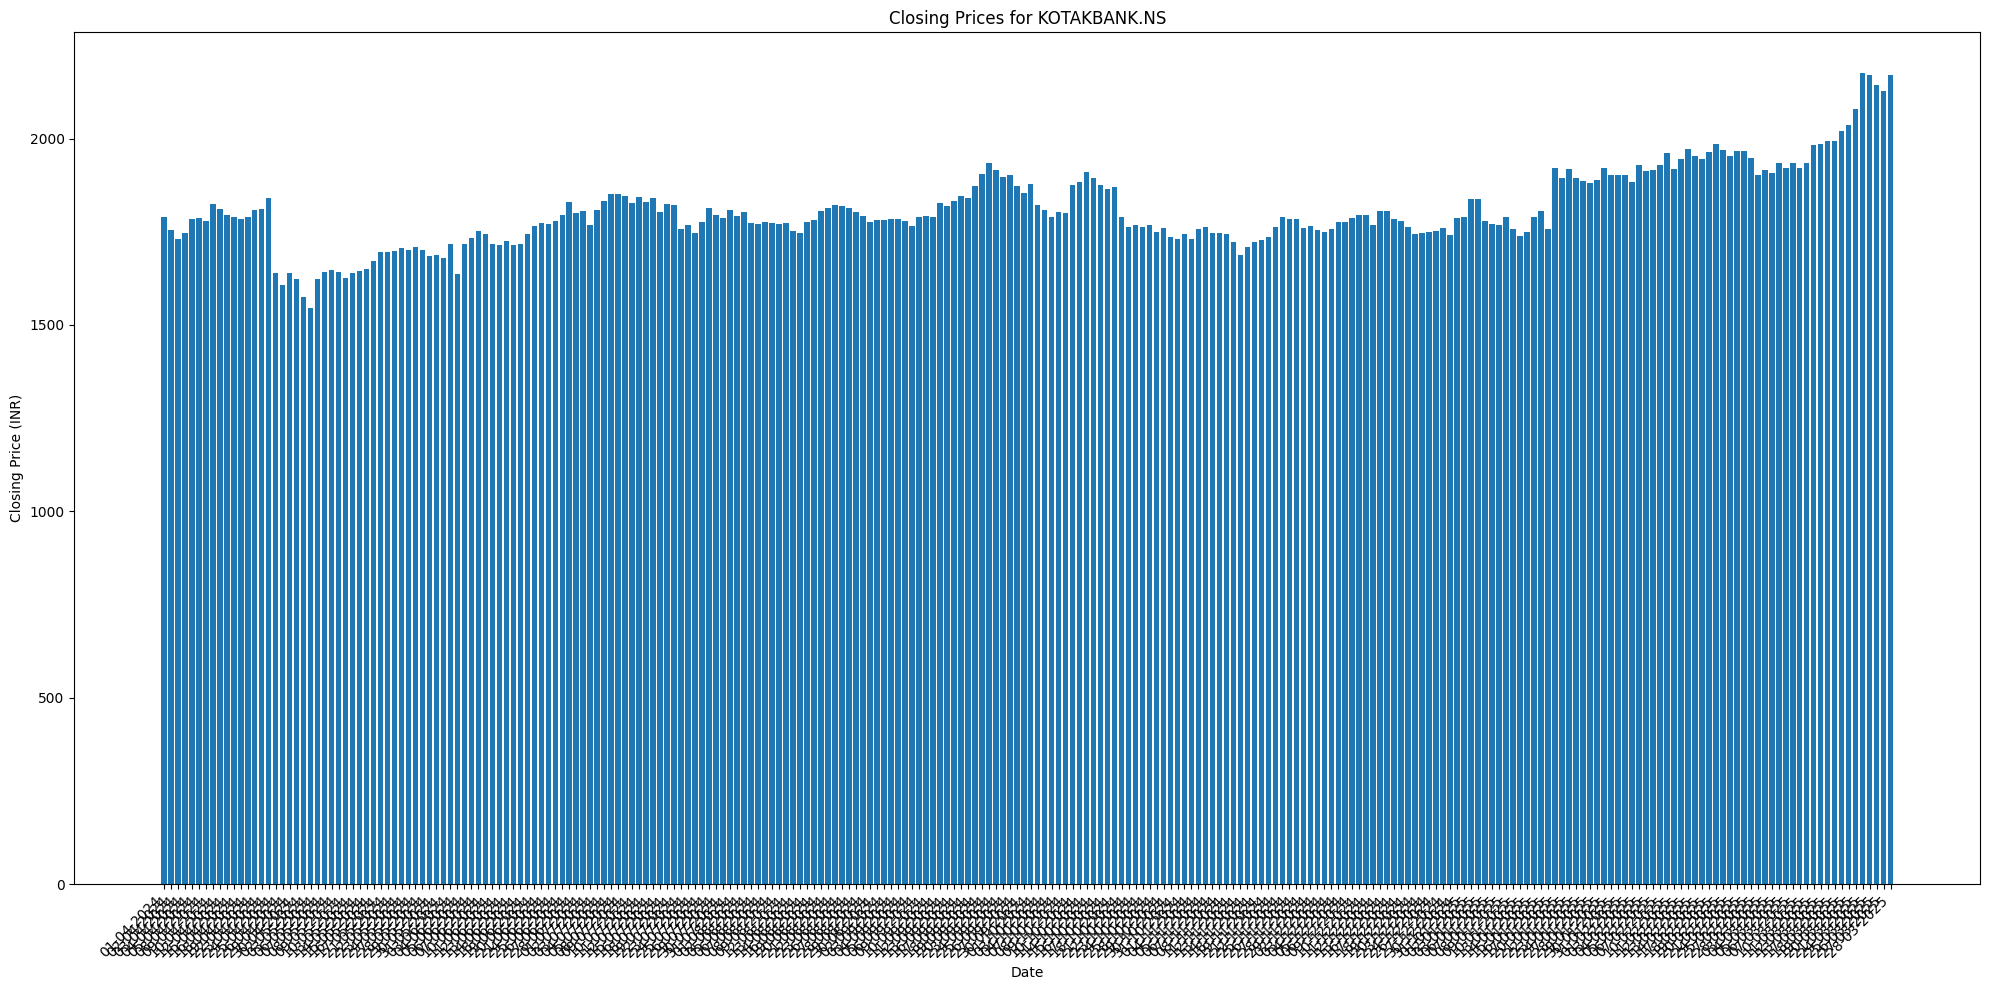

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("/content/banking_stock_data New.csv", index_col="Date") # Assuming 'Date' is the index column

# Create bar graph for each stock
for stock in df["Stock"].unique():
    stock_data = df[df["Stock"] == stock]
    plt.figure(figsize=(20, 10))  # Adjust figure size as needed
    plt.bar(stock_data.index, stock_data["Close"])
    plt.xlabel("Date")
    plt.ylabel("Closing Price (INR)")
    plt.title(f"Closing Prices for {stock}")
    plt.xticks(rotation=45, ha="right") # Rotate x-axis labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()


In [ ]:
# Calculate standard deviation of closing stock
volatility = df.groupby("Stock")["Close"].std()
print("Volatility (Standard Deviation of Closing stock):")
print(volatility)

Volatility (Standard Deviation of Closing stock):
Stock
AXISBANK.NS      84.794082
HDFCBANK.NS     103.178888
ICICIBANK.NS     74.843781
KOTAKBANK.NS    101.635732
SBIN.NS          43.916665
Name: Close, dtype: float64


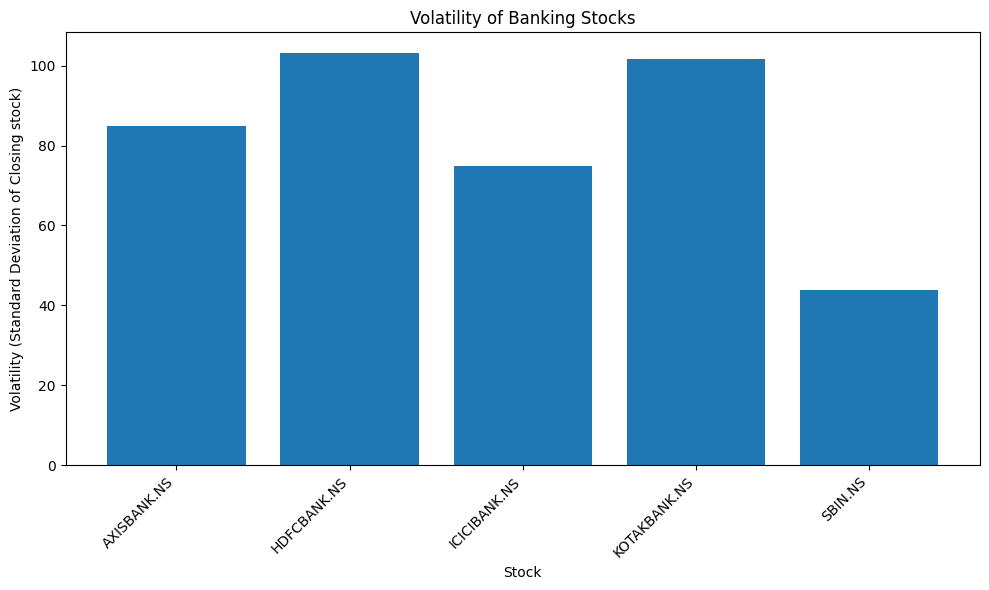

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'volatility' is already calculated as in the provided code
# volatility = df.groupby("Stock")["Close"].std()

# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(volatility.index, volatility.values)
plt.xlabel("Stock")
plt.ylabel("Volatility (Standard Deviation of Closing stock)")
plt.title("Volatility of Banking Stocks")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
# Calculate standard deviation of opening stock
volatility = df.groupby("Stock")["Open"].std()
print("Volatility (Standard Deviation of Opening stock):")
print(volatility)

Volatility (Standard Deviation of Opening stock):
Stock
AXISBANK.NS      85.504364
HDFCBANK.NS     103.622599
ICICIBANK.NS     74.111061
KOTAKBANK.NS     99.821158
SBIN.NS          44.013515
Name: Open, dtype: float64


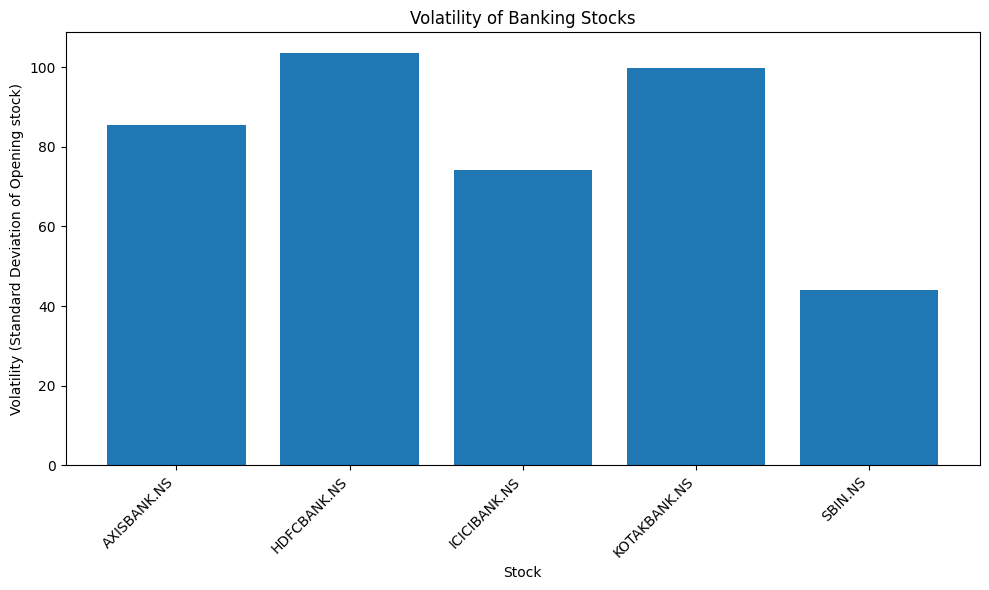

In [ ]:
# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(volatility.index, volatility.values)
plt.xlabel("Stock")
plt.ylabel("Volatility (Standard Deviation of Opening stock)")
plt.title("Volatility of Banking Stocks")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
# Calculate standard deviation of opening stock
volatility = df.groupby("Stock")["High"].std()
print("Volatility (Standard Deviation of high stock):")
print(volatility)

Volatility (Standard Deviation of high stock):
Stock
AXISBANK.NS      86.012116
HDFCBANK.NS     103.657039
ICICIBANK.NS     74.668221
KOTAKBANK.NS    101.261401
SBIN.NS          44.551154
Name: High, dtype: float64


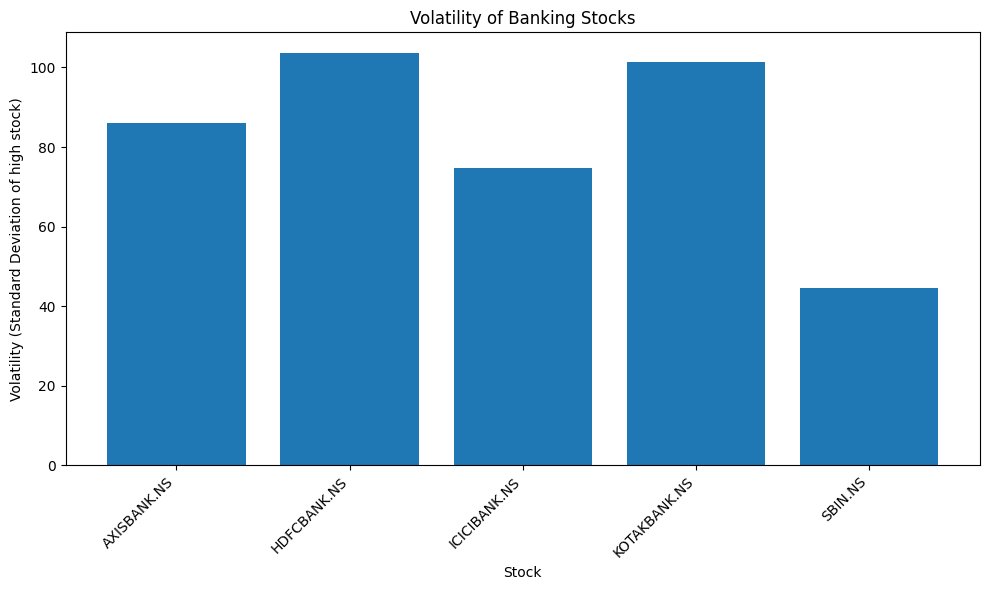

In [ ]:
# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(volatility.index, volatility.values)
plt.xlabel("Stock")
plt.ylabel("Volatility (Standard Deviation of high stock)")
plt.title("Volatility of Banking Stocks")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# Calculate standard deviation of opening stock
volatility = df.groupby("Stock")["Low"].std()
print("Volatility (Standard Deviation of Low stock):")
print(volatility)

Volatility (Standard Deviation of Low stock):
Stock
AXISBANK.NS      83.957675
HDFCBANK.NS     102.402645
ICICIBANK.NS     74.864652
KOTAKBANK.NS     99.686677
SBIN.NS          43.794094
Name: Low, dtype: float64


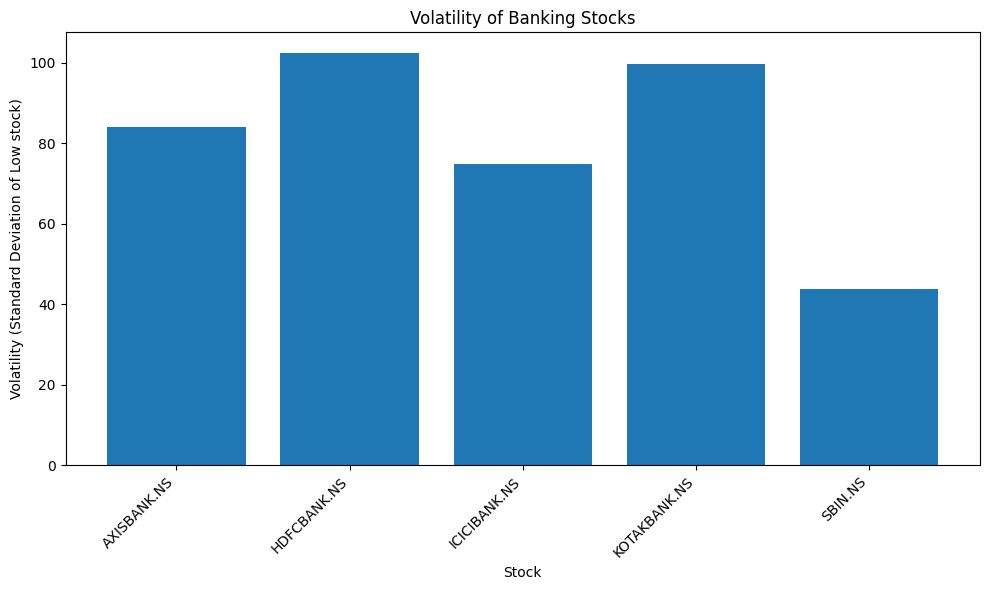

In [ ]:
# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(volatility.index, volatility.values)
plt.xlabel("Stock")
plt.ylabel("Volatility (Standard Deviation of Low stock)")
plt.title("Volatility of Banking Stocks")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

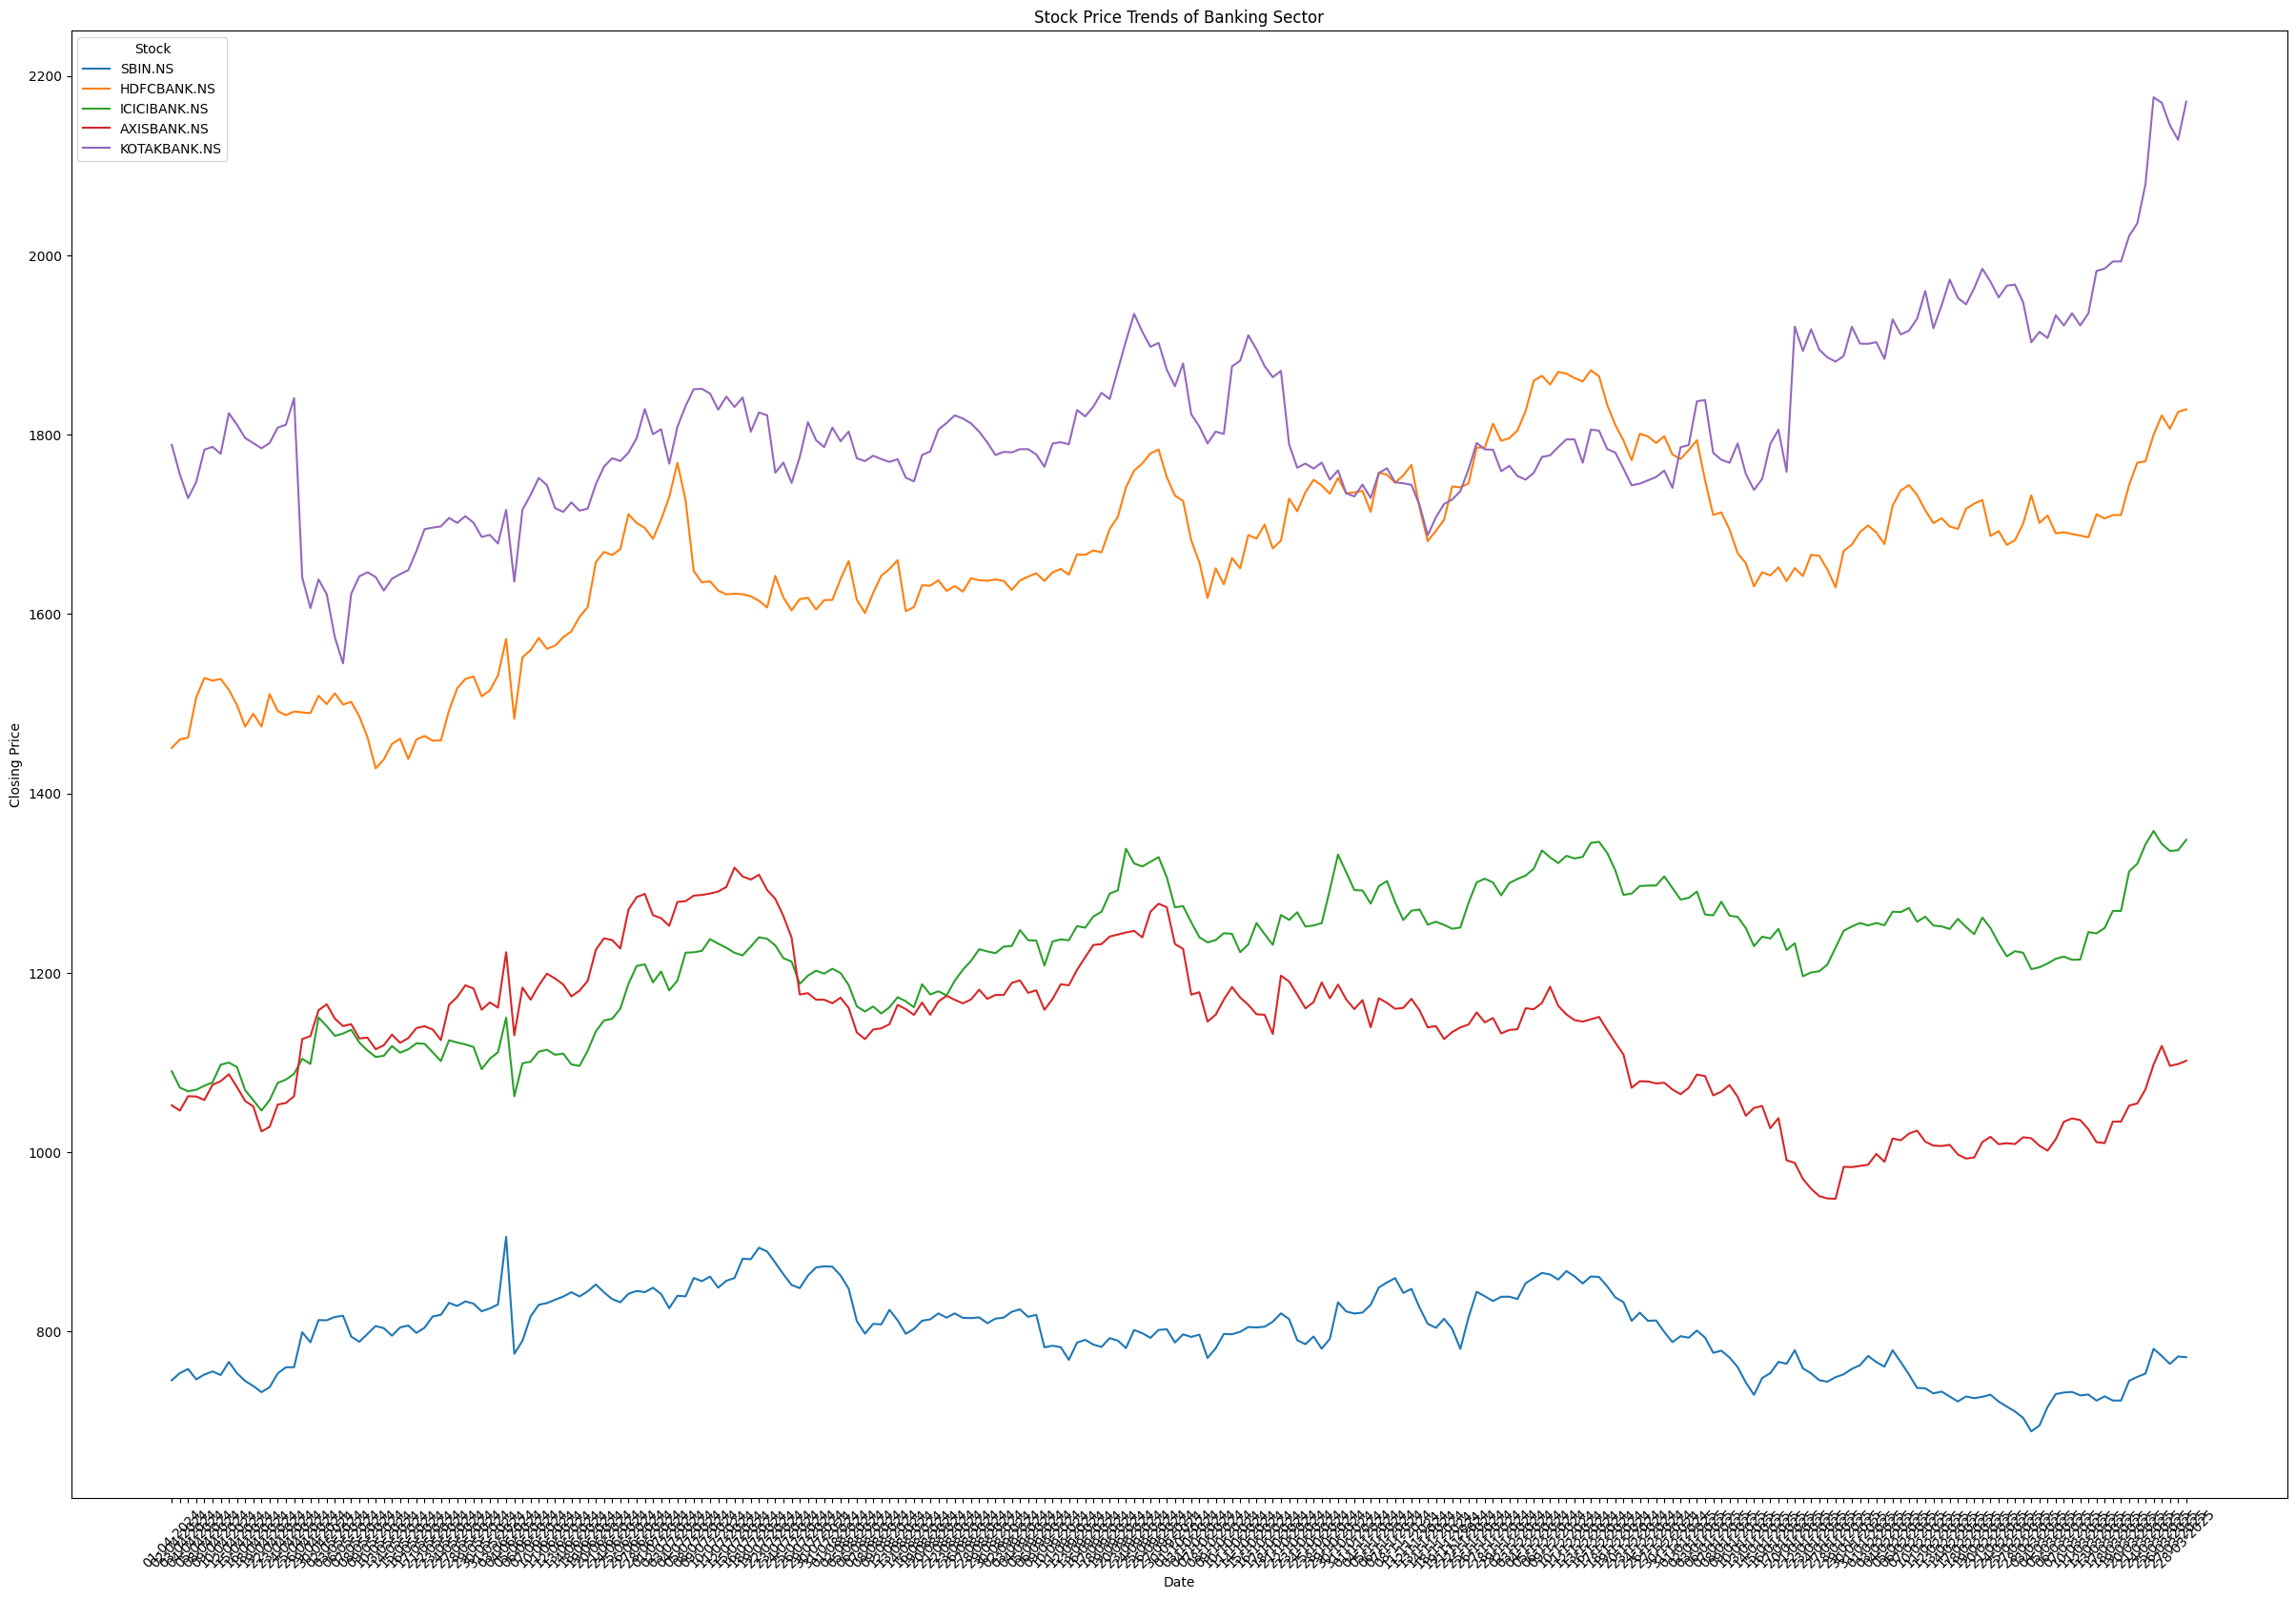

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn automatically applies the 'darkgrid' style.
# If you still want to explicitly set it:
# sns.set_style("darkgrid")

# Plot stock price trends for each bank
plt.figure(figsize=(30, 20))
sns.lineplot(data=df, x="Date", y="Close", hue="Stock")

# Labels and title
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Price Trends of Banking Sector")
plt.legend(title="Stock")
plt.xticks(rotation=45)
plt.show()

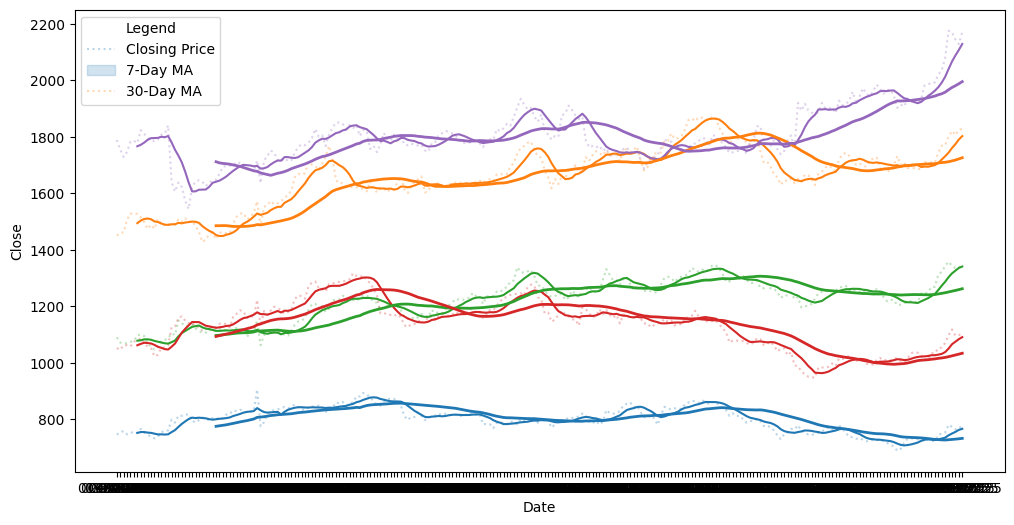

In [ ]:
# Calculate Moving Averages (7-day and 30-day)
df["MA_7"] = df.groupby("Stock")["Close"].transform(lambda x: x.rolling(window=7).mean())
df["MA_30"] = df.groupby("Stock")["Close"].transform(lambda x: x.rolling(window=30).mean())

# Reset index to avoid duplicate 'Date' values
df = df.reset_index()

# Plot Moving Averages for each stock
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Close", hue="Stock", alpha=0.3, linestyle="dotted") # Removed label here
sns.lineplot(data=df, x="Date", y="MA_7", hue="Stock", linewidth=1.5)  # Removed label here
sns.lineplot(data=df, x="Date", y="MA_30", hue="Stock", linewidth=2)  # Removed label here


# Add a legend outside the plotting functions
plt.legend(labels=["Closing Price", "7-Day MA", "30-Day MA"], title="Legend")
# Assuming you want these labels, adjust if needed

plt.show()

<ipython-input-116-8d544302768a>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()  # Remove the legend if not needed


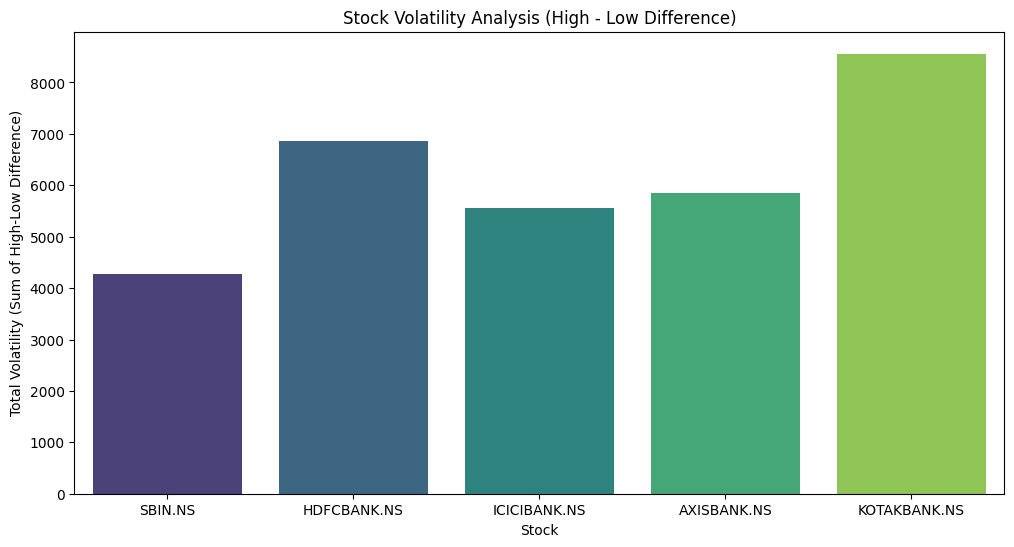

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute daily volatility (High - Low)
df["Volatility"] = df["High"] - df["Low"]

# Plot volatility for each stock
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Stock", y="Volatility", estimator=sum, errorbar=None, hue="Stock", dodge=False, palette="viridis")

# Labels and title
plt.xlabel("Stock")
plt.ylabel("Total Volatility (Sum of High-Low Difference)")
plt.title("Stock Volatility Analysis (High - Low Difference)")
plt.legend().remove()  # Remove the legend if not needed
plt.show()


In [ ]:
import pandas as pd

# Compute daily volatility percentage (High - Low) / High * 100
df["Volatility_Percentage"] = ((df["High"] - df["Low"]) / df["High"]) * 100

# Display the table with relevant columns
df_table = df[["Stock", "High", "Low", "Volatility_Percentage"]]
print(df_table)


             Stock         High          Low  Volatility_Percentage
0          SBIN.NS   748.940508   739.695519               1.234409
1          SBIN.NS   756.070922   740.924892               2.003255
2          SBIN.NS   759.857432   747.612818               1.611436
3          SBIN.NS   762.512905   745.596574               2.218498
4          SBIN.NS   755.038259   740.187269               1.966919
...            ...          ...          ...                    ...
1235  KOTAKBANK.NS  2184.250000  2090.250000               4.303537
1236  KOTAKBANK.NS  2202.500000  2160.000000               1.929625
1237  KOTAKBANK.NS  2176.000000  2129.899902               2.118571
1238  KOTAKBANK.NS  2151.399902  2111.850098               1.838329
1239  KOTAKBANK.NS  2179.899902  2139.000000               1.876228

[1240 rows x 4 columns]


In [ ]:
# Moving Averages
df["MA_7"] = df.groupby("Stock")["Close"].transform(lambda x: x.rolling(window=7).mean())
df["MA_30"] = df.groupby("Stock")["Close"].transform(lambda x: x.rolling(window=30).mean())

# Volatility (High - Low)
df["Volatility"] = df["High"] - df["Low"]

# Lag Feature (Previous day's closing price)
df["Prev_Close"] = df.groupby("Stock")["Close"].shift(1)

# Drop NaN values caused by rolling and lag features
df = df.dropna()

# Display processed data
df.head()


,Date,Close,High,Low,Open,Volume,Stock,MA_7,MA_30,Volatility,Volatility_Percentage,Prev_Close
29,15-05-2024,806.770691,811.688225,804.557800,807.459158,9755062,SBIN.NS,800.455191,775.249320,7.130425,0.878468,804.705383
30,16-05-2024,798.558472,812.524282,784.199234,811.688265,20536990,SBIN.NS,801.867231,777.008160,28.325048,3.486056,806.770691
31,17-05-2024,804.361084,808.885252,797.820799,801.066360,12492509,SBIN.NS,802.857762,778.694873,11.064453,1.367864,798.558472
32,21-05-2024,816.950073,822.506852,806.082273,807.459207,14037801,SBIN.NS,804.382211,780.648775,16.424578,1.996893,804.361084
33,22-05-2024,818.750000,826.650024,813.549988,826.549988,19239277,SBIN.NS,806.508013,783.047882,13.100037,1.584714,816.950073



Trading Volume Analysis:
              Total Volume  Average Volume  Median Volume  Volume Volatility
Stock                                                                       
AXISBANK.NS     2357944266    9.507840e+06      8102680.5       5.798176e+06
HDFCBANK.NS     4341494864    1.750603e+07     13898827.5       1.990332e+07
ICICIBANK.NS    3395953567    1.369336e+07     11511198.5       8.898455e+06
KOTAKBANK.NS    1377315879    5.553693e+06      4122256.0       5.424924e+06
SBIN.NS         3739584223    1.507897e+07     12706498.5       1.089140e+07


<ipython-input-118-13b4dd6b3169>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volume_analysis.index, y="Total Volume", data=volume_analysis.reset_index(), palette="viridis")


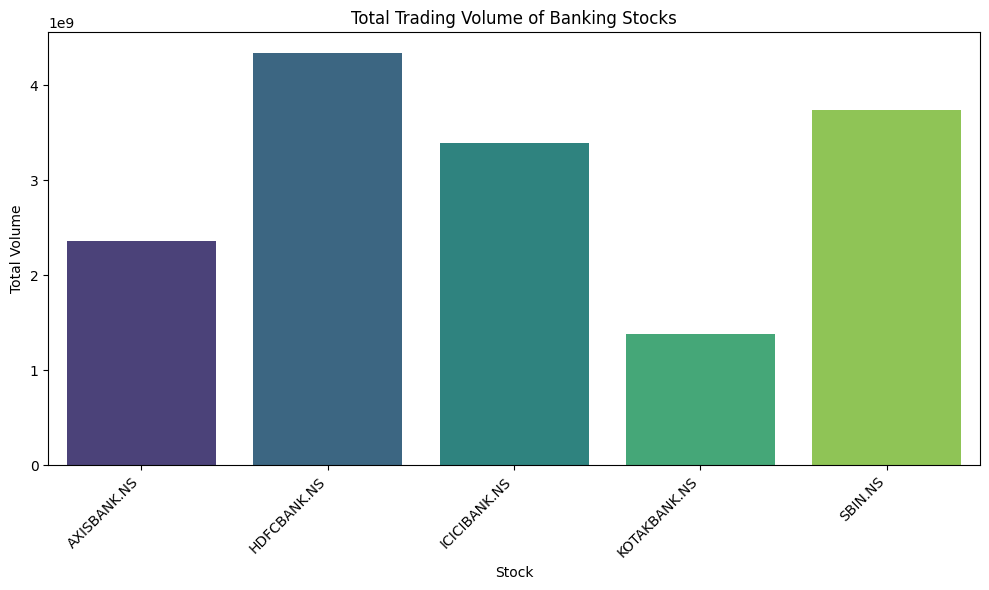

<ipython-input-118-13b4dd6b3169>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volume_analysis.index, y="Average Volume", data=volume_analysis.reset_index(), palette="magma")


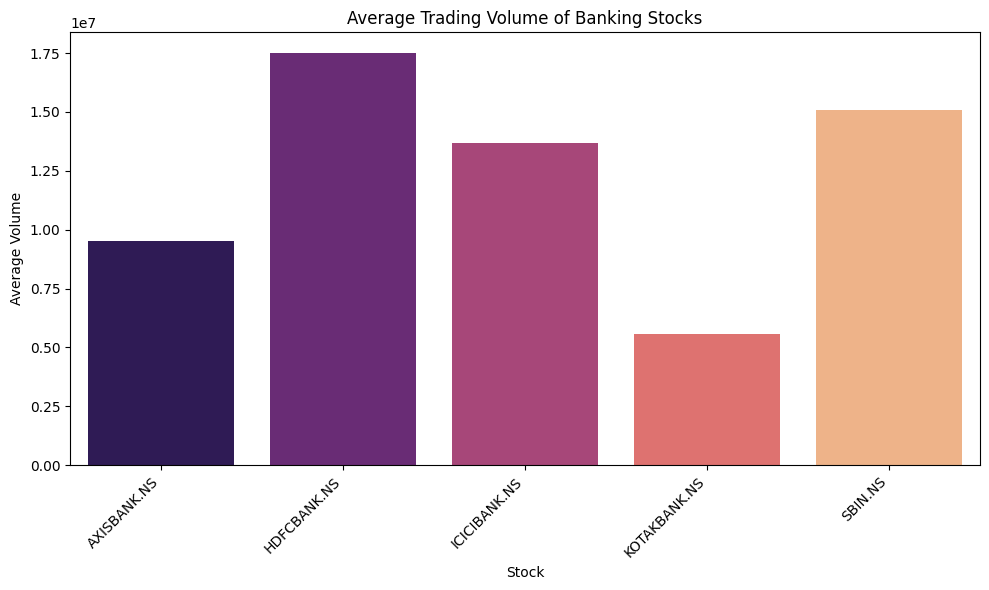

<ipython-input-118-13b4dd6b3169>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volume_analysis.index, y="Median Volume", data=volume_analysis.reset_index(), palette="deep")


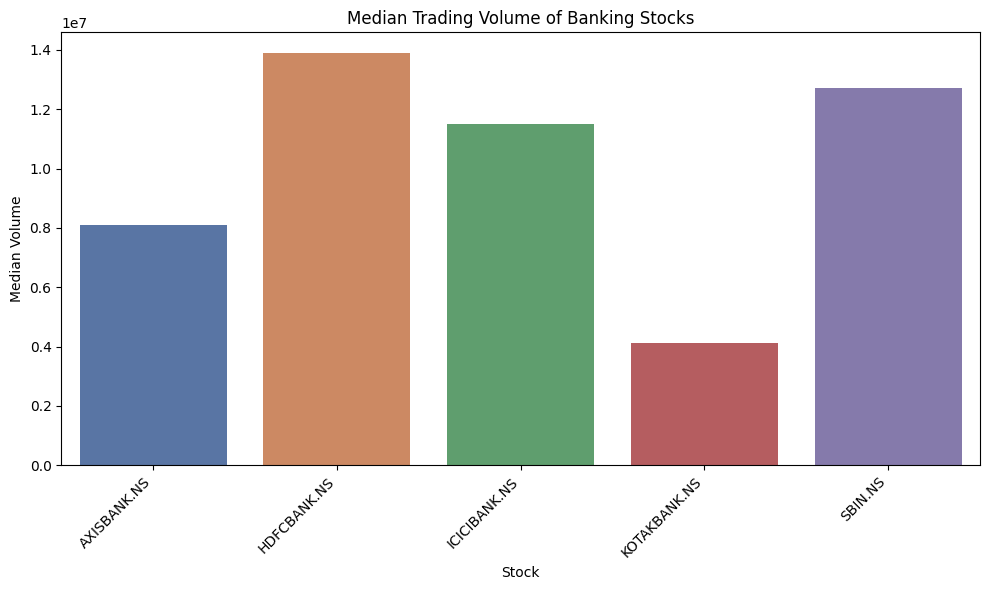

<ipython-input-118-13b4dd6b3169>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volume_analysis.index, y="Volume Volatility", data=volume_analysis.reset_index(), palette="dark")


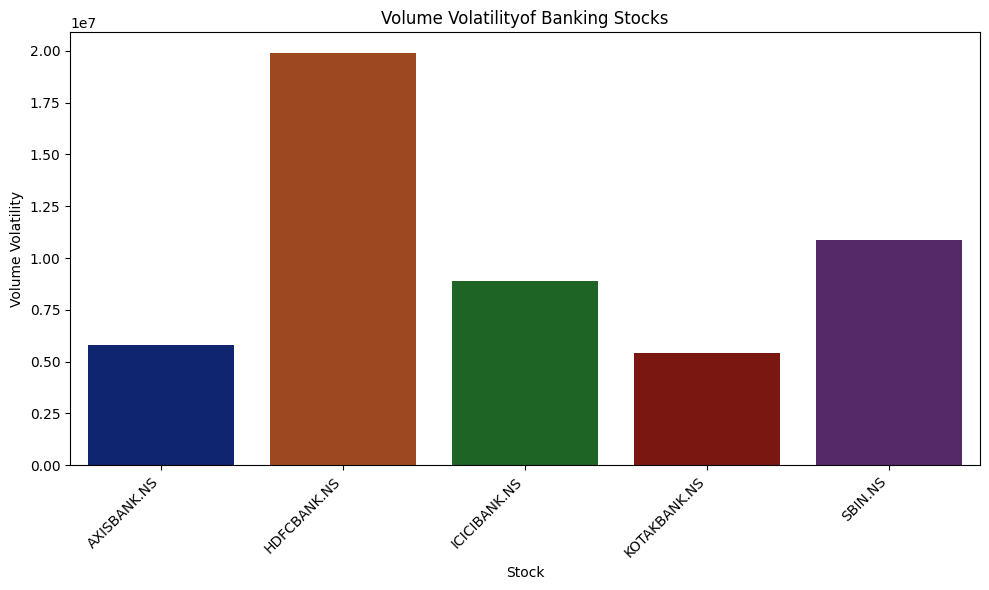

In [ ]:
# prompt: create trading volume analysis

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and preprocessed as in the previous code

# Calculate the trading volume for each stock
volume_analysis = df.groupby("Stock")["Volume"].agg(["sum", "mean", "median", "std"])

# Rename columns for better clarity
volume_analysis = volume_analysis.rename(
    columns={
        "sum": "Total Volume",
        "mean": "Average Volume",
        "median": "Median Volume",
        "std": "Volume Volatility",
    }
)

# Display the volume analysis table
print("\nTrading Volume Analysis:")
print(volume_analysis)


# Visualize trading volume
plt.figure(figsize=(10, 6))
sns.barplot(x=volume_analysis.index, y="Total Volume", data=volume_analysis.reset_index(), palette="viridis")
plt.xlabel("Stock")
plt.ylabel("Total Volume")
plt.title("Total Trading Volume of Banking Stocks")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Visualize average trading volume
plt.figure(figsize=(10, 6))
sns.barplot(x=volume_analysis.index, y="Average Volume", data=volume_analysis.reset_index(), palette="magma")
plt.xlabel("Stock")
plt.ylabel("Average Volume")
plt.title("Average Trading Volume of Banking Stocks")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Visualize median trading volume
plt.figure(figsize=(10, 6))
sns.barplot(x=volume_analysis.index, y="Median Volume", data=volume_analysis.reset_index(), palette="deep")
plt.xlabel("Stock")
plt.ylabel("Median Volume")
plt.title("Median Trading Volume of Banking Stocks")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Visualize average trading volume
plt.figure(figsize=(10, 6))
sns.barplot(x=volume_analysis.index, y="Volume Volatility", data=volume_analysis.reset_index(), palette="dark")
plt.xlabel("Stock")
plt.ylabel("Volume Volatility")
plt.title("Volume Volatilityof Banking Stocks")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Select relevant features and target variable
features = ["MA_7", "MA_30", "Volatility", "Prev_Close", "Volume"]
target = "Close"

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Check data shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((876, 5), (219, 5), (876,), (219,))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
# Instead of using 'squared=False', calculate RMSE manually:
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = mse**0.5  # Calculate RMSE from MSE

r2 = r2_score(y_test, y_pred)  # R² Score

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


RMSE: 19.822285880282777
R² Score: 0.9974018100739225


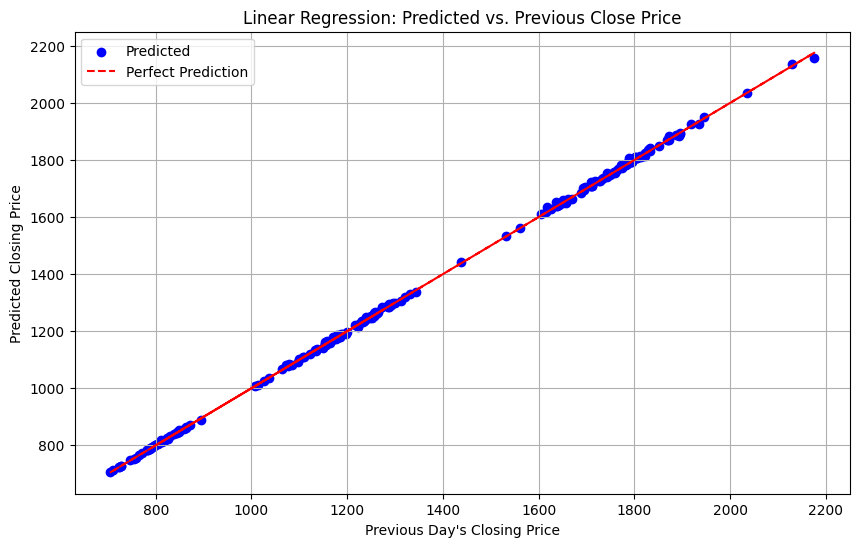

In [ ]:
# prompt: I need a linear equation graph for the above"# Initialize and train the model
# model = LinearRegression()
# model.fit(X_train, y_train)
# # Make predictions
# y_pred = model.predict(X_test)
# # Evaluate the model
# # Instead of using 'squared=False', calculate RMSE manually:
# mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
# rmse = mse**0.5  # Calculate RMSE from MSE
# r2 = r2_score(y_test, y_pred)  # R² Score
# print(f"RMSE: {rmse}")
# print(f"R² Score: {r2}")"

import matplotlib.pyplot as plt

# Assuming X_test and y_pred are already defined from the previous code
# Example:
# X_test = ...  # Your X_test data
# y_pred = ... # Your y_pred data

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test["Prev_Close"], y_pred, color='blue', label="Predicted") # Use 'Prev_Close' for x-axis
plt.plot(X_test["Prev_Close"], X_test["Prev_Close"], color='red', linestyle='--', label="Perfect Prediction") # Plot a line for perfect prediction

# Add labels and title
plt.xlabel("Previous Day's Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Linear Regression: Predicted vs. Previous Close Price")
plt.legend()
plt.grid(True) # Add a grid

# Show the plot
plt.show()


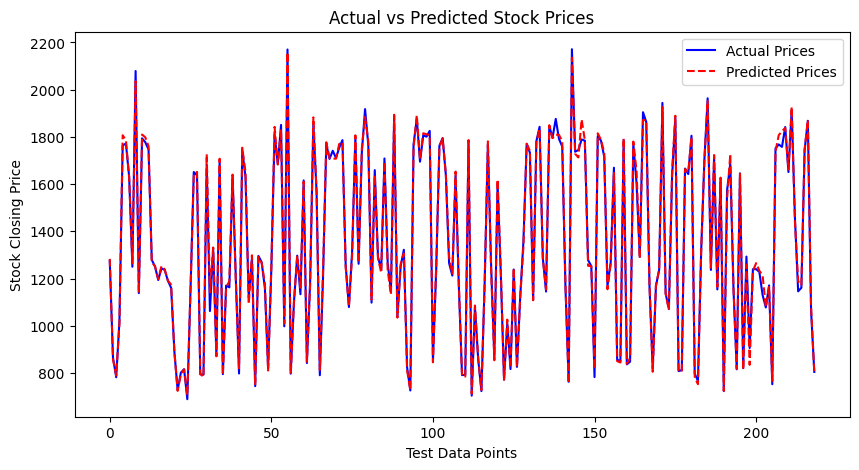

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted stock prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Prices", color='blue')
plt.plot(y_pred, label="Predicted Prices", color='red', linestyle="dashed")
plt.xlabel("Test Data Points")
plt.ylabel("Stock Closing Price")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model
# Calculate MSE first
mse_rf = mean_squared_error(y_test, y_rf_pred)
# Then calculate RMSE from MSE
rmse_rf = mse_rf**0.5

r2_rf = r2_score(y_test, y_rf_pred)

print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R² Score: {r2_rf}")

Random Forest RMSE: 21.074867353161373
Random Forest R² Score: 0.9970630731913616


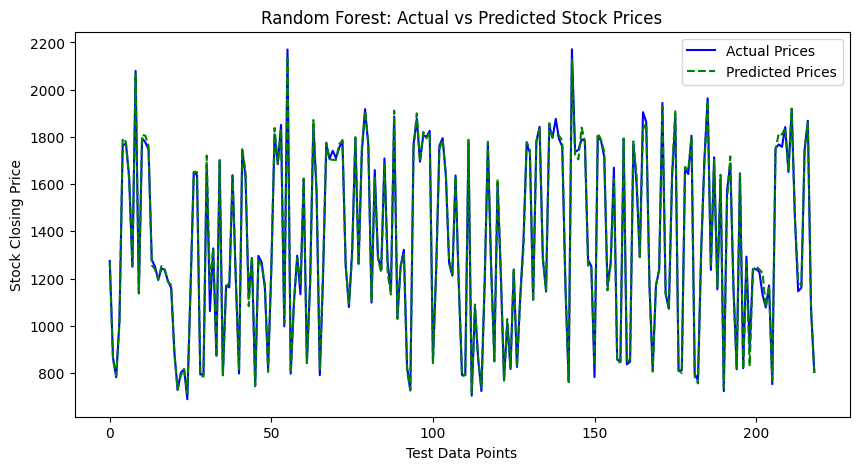

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted stock prices using Random Forest
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Prices", color='blue')
plt.plot(y_rf_pred, label="Predicted Prices", color='green', linestyle="dashed")
plt.xlabel("Test Data Points")
plt.ylabel("Stock Closing Price")
plt.title("Random Forest: Actual vs Predicted Stock Prices")
plt.legend()
plt.show()


In [ ]:
pip install tensorflow


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Scale the data (LSTM works better with scaled values)
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(df[["MA_7", "MA_30", "Volatility", "Prev_Close", "Volume"]])
y_scaled = scaler.fit_transform(df[["Close"]])

# Convert to a time-series format (sequence of 10 days -> predict next day's close price)
time_steps = 10

X_lstm, y_lstm = [], []
for i in range(time_steps, len(X_scaled)):
    X_lstm.append(X_scaled[i-time_steps:i])  # Last 10 days of data
    y_lstm.append(y_scaled[i])  # Predict the next day's price

# Convert lists to NumPy arrays
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Train-test split (80% train, 20% test)
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

# Print the shape (LSTM input: samples, timesteps, features)
X_train_lstm.shape, X_test_lstm.shape, y_train_lstm.shape, y_test_lstm.shape


((868, 10, 5), (217, 10, 5), (868, 1), (217, 1))

In [ ]:
# Build LSTM model
model_lstm = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
model_lstm.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
history = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 0.0678 - val_loss: 0.0036
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0069 - val_loss: 0.0030
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0046 - val_loss: 0.0039
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0052 - val_loss: 0.0040
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0046 - val_loss: 0.0031
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0049 - val_loss: 0.0032
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0034 - val_loss: 0.0027
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0036 - val_loss: 0.0023
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0038 - val_l

In [ ]:
# Make predictions
y_lstm_pred = model_lstm.predict(X_test_lstm)

# Reverse scaling to get actual values
y_lstm_pred = scaler.inverse_transform(y_lstm_pred)
y_test_lstm_actual = scaler.inverse_transform(y_test_lstm)

# Compute RMSE
rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm_actual, y_lstm_pred))

print(f"LSTM RMSE: {rmse_lstm}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
LSTM RMSE: 44.66579391291366


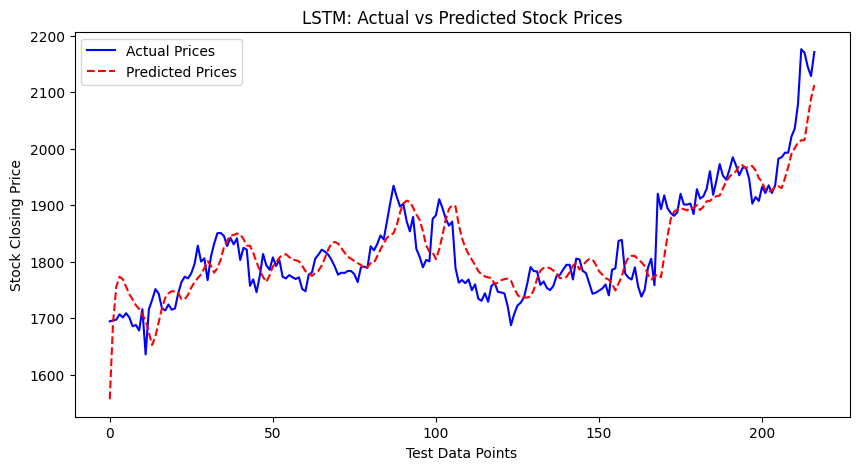

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted stock prices using LSTM
plt.figure(figsize=(10, 5))
plt.plot(y_test_lstm_actual, label="Actual Prices", color='blue')
plt.plot(y_lstm_pred, label="Predicted Prices", color='red', linestyle="dashed")
plt.xlabel("Test Data Points")
plt.ylabel("Stock Closing Price")
plt.title("LSTM: Actual vs Predicted Stock Prices")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import r2_score

# Compute R² score for LSTM
r2_lstm = r2_score(y_test_lstm_actual, y_lstm_pred)

print(f"LSTM R² Score: {r2_lstm}")


LSTM R² Score: 0.7814336602243532


In [ ]:
import pandas as pd

# Store results in a dictionary
results = {
    "Model": ["Linear Regression", "Random Forest", "LSTM"],
    "RMSE": [rmse, rmse_rf, rmse_lstm],
    "R² Score": [r2, r2_rf, r2_lstm]
}

# Convert to DataFrame for better readability
results_df = pd.DataFrame(results)

# Display the comparison table
print(results_df)


               Model       RMSE  R² Score
0  Linear Regression  19.822286  0.997402
1      Random Forest  21.074867  0.997063
2               LSTM  44.665794  0.781434


<ipython-input-134-6e6f1a285862>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["Model"], y=results_df["RMSE"], palette="coolwarm")


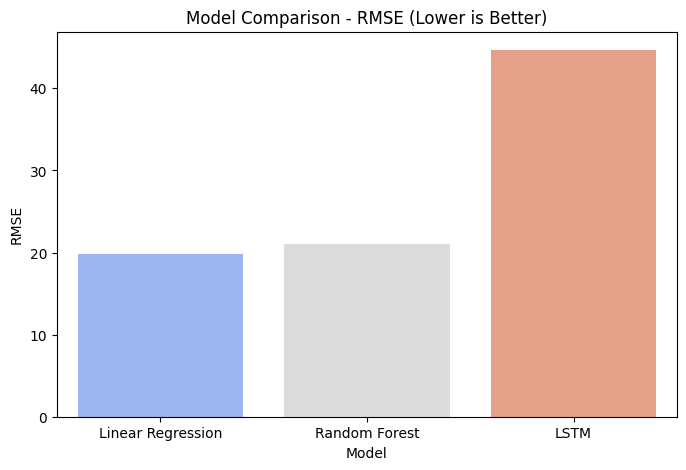

<ipython-input-134-6e6f1a285862>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["Model"], y=results_df["R² Score"], palette="coolwarm")


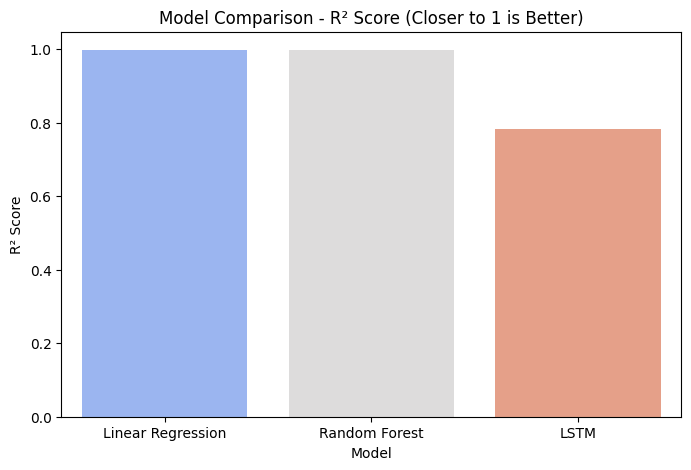

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for RMSE Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df["Model"], y=results_df["RMSE"], palette="coolwarm")
plt.title("Model Comparison - RMSE (Lower is Better)")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.show()

# Bar plot for R² Score Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df["Model"], y=results_df["R² Score"], palette="coolwarm")
plt.title("Model Comparison - R² Score (Closer to 1 is Better)")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.show()
